In [1]:
# basic plotting imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

from scipy import io
import numpy as np

from neurodsp import sim
from neurodsp import spectral

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

In [6]:
fs = 1000
simulated_kernel = sim.sim_synaptic_kernel(n_seconds = 0.5, fs = fs, tau_r = 0.01, tau_d = 0.05)

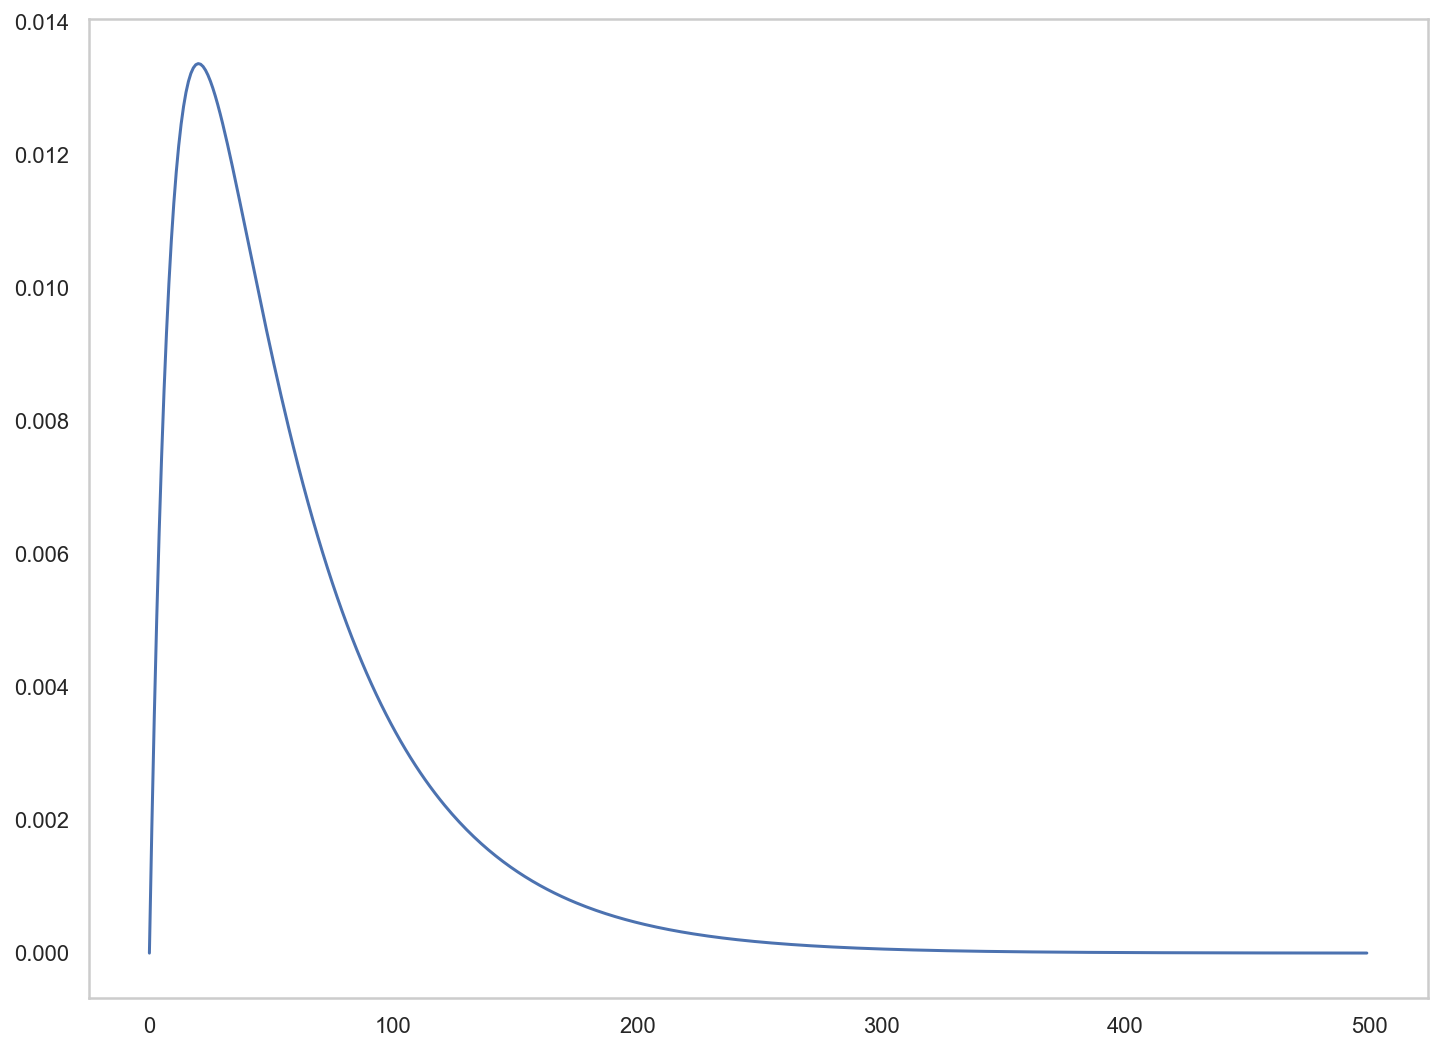

In [7]:
plt.plot(simulated_kernel)
plt.show()

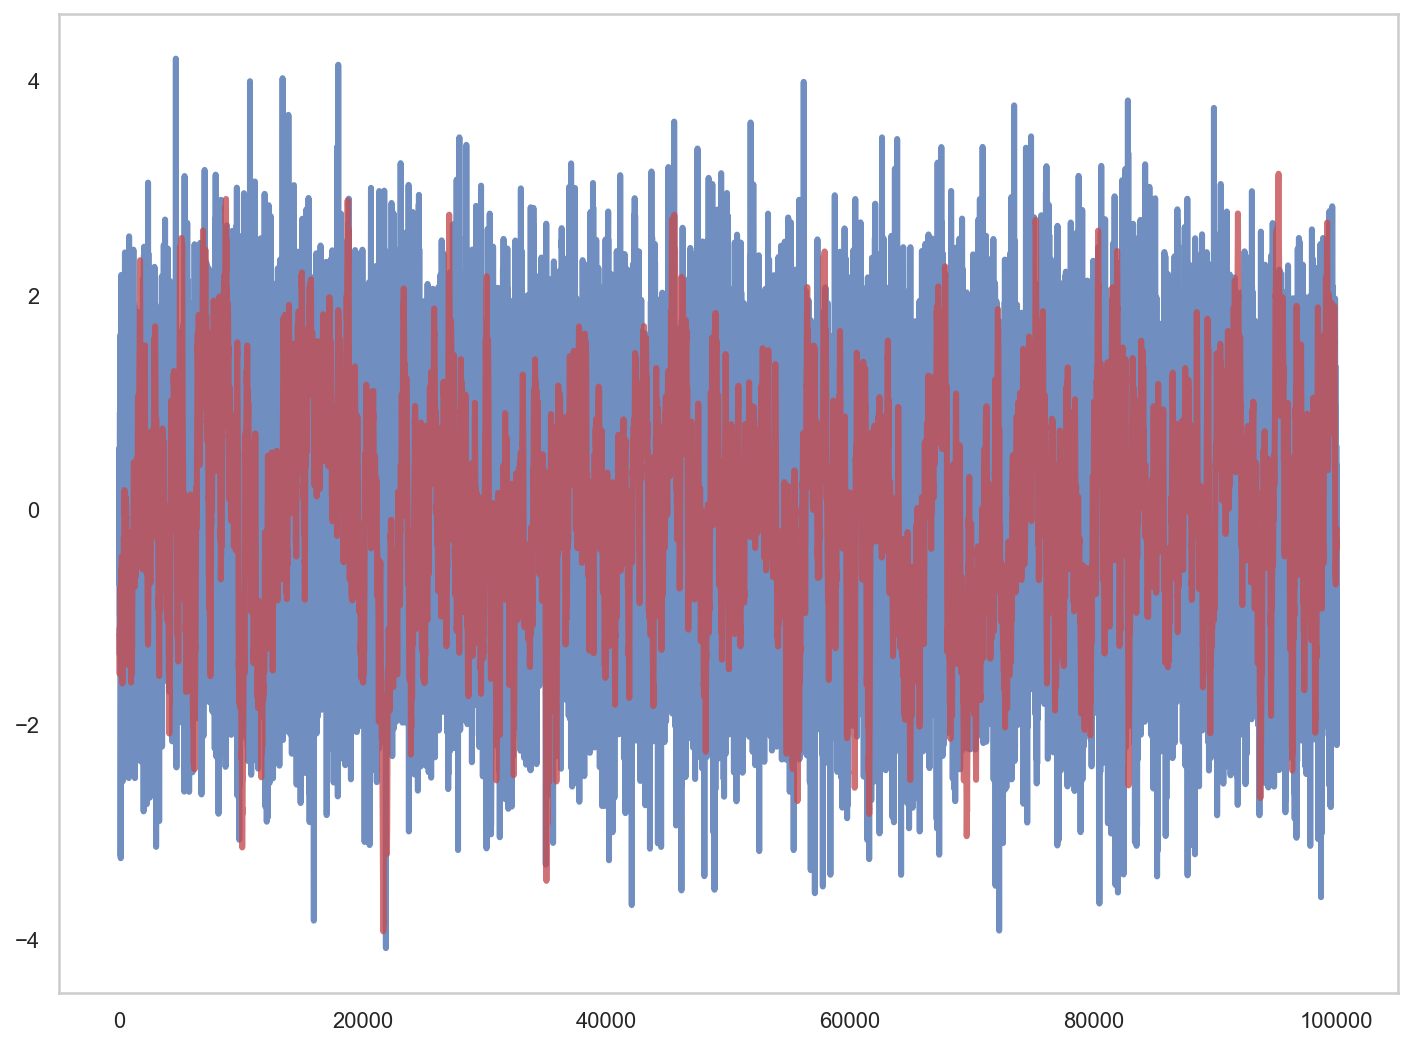

In [10]:
sim_lfp_e = sim.sim_synaptic_current(100, 1000, 1000, 2., tau_r = 0.002, tau_d = 0.005)
sim_lfp_i = sim.sim_synaptic_current(100, 1000, 1000, 12., tau_r = 0.01, tau_d = 0.2)
plt.plot(sim_lfp_e, 'b', linewidth = 3, alpha = 0.8)
plt.plot(sim_lfp_i, 'r', linewidth = 3, alpha = 0.8)
plt.show()

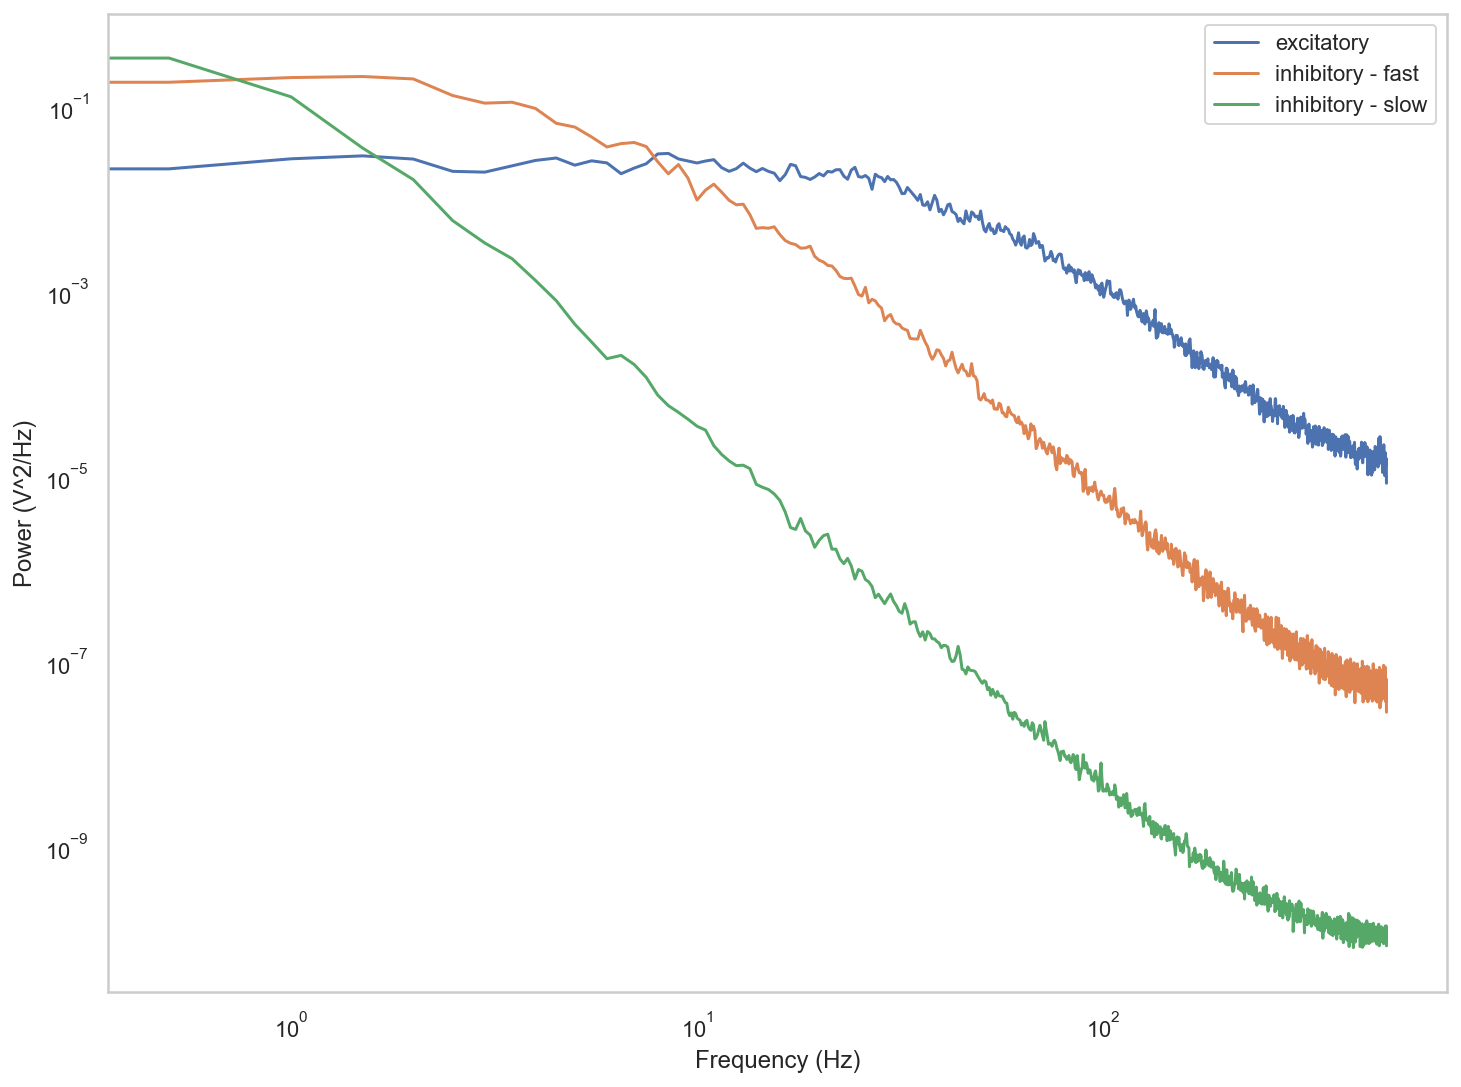

In [35]:
fs = 1000. # sampling rate
sim_time = 100. # in seconds
n_neurons = 1000
e_rate = 2.
i_rate = 12.

sim_lfp_e = sim.sim_synaptic_current(sim_time, fs, n_neurons,
                            e_rate, tau_r = 0.002, tau_d = 0.005)
sim_lfp_i_fast = sim.sim_synaptic_current(sim_time, fs, n_neurons,
                            i_rate, tau_r = 0.01, tau_d = 0.05)
sim_lfp_i_slow = sim.sim_synaptic_current(sim_time, fs, n_neurons,
                            i_rate, tau_r = 0.1, tau_d = 1.)

freq_mean_e, P_e = spectral.compute_spectrum(sim_lfp_e,
                            fs, nperseg=fs*2)
freq_mean_i, P_i_fast = spectral.compute_spectrum(sim_lfp_i_fast,
                            fs, nperseg=fs*2)
freq_mean_i, P_i_slow = spectral.compute_spectrum(sim_lfp_i_slow,
                            fs, nperseg=fs*2)

plt.loglog(freq_mean_e, P_e, label='excitatory')
plt.loglog(freq_mean_i, P_i_fast, label='inhibitory - fast')
plt.loglog(freq_mean_i, P_i_slow, label='inhibitory - slow')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.legend()
plt.show()


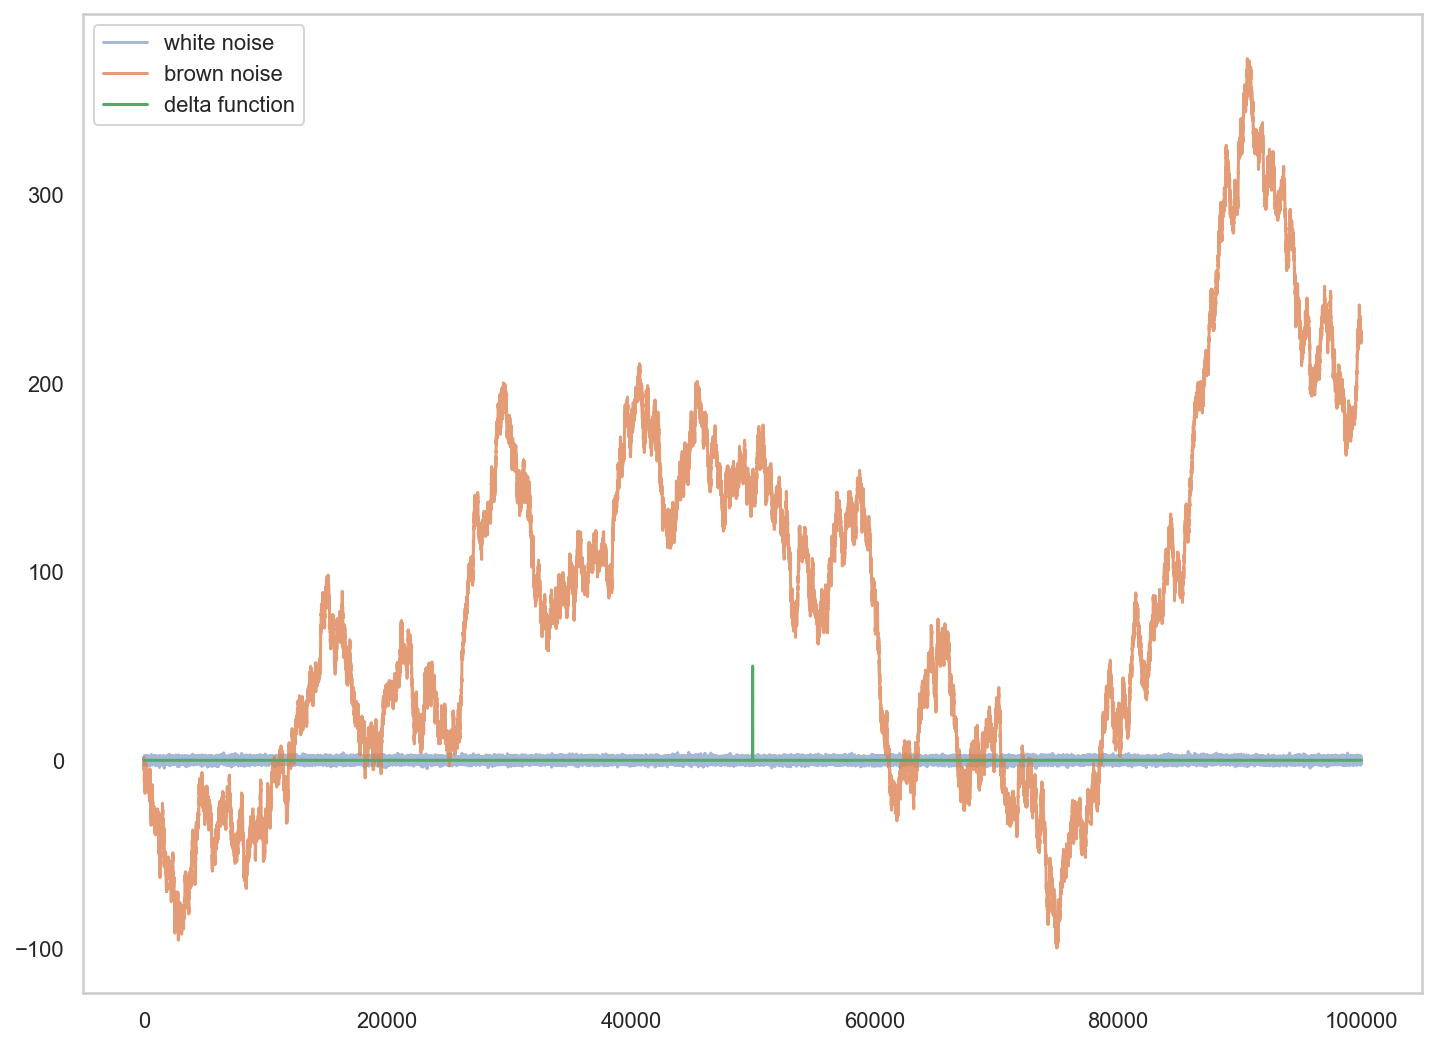

In [87]:
fs = 1000
sim_time = 100

# simulate dirac delta function
delta_data = np.zeros(fs*sim_time)
delta_data[int(np.floor(fs*sim_time/2))] = 50

# simulate (Gaussian / normal) white noise
white_noise = np.random.randn(fs*sim_time)
# white_noise = white_noise / np.max(np.abs(white_noise)) # normalize by maximum

# simulate brown noise
brown_noise = np.cumsum(white_noise)
# brown_noise = brown_noise / np.max(np.abs(brown_noise)) # normalize by maximum


plt.plot(white_noise, label='white noise', alpha = 0.5)
plt.plot(brown_noise, label='brown noise', alpha = 0.8)
plt.plot(delta_data, label='delta function')
plt.legend()
plt.show()

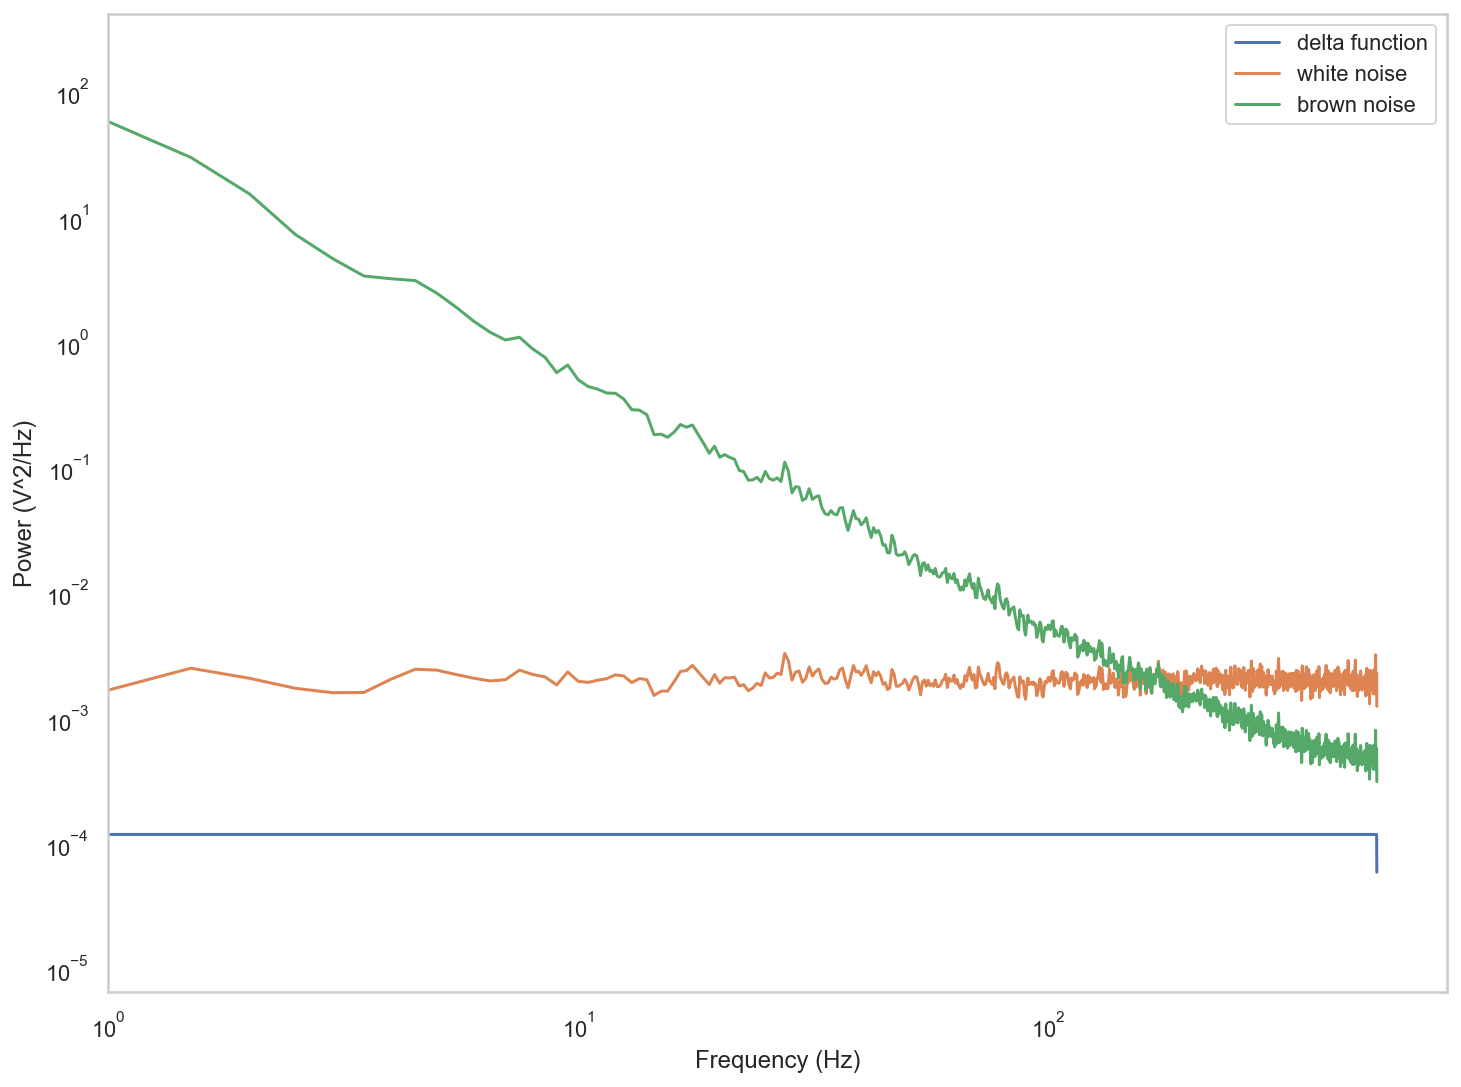

In [88]:
freq_mean, P_d = spectral.compute_spectrum(delta_data, fs, nperseg=fs*2)
freq_mean, P_w = spectral.compute_spectrum(white_noise, fs, nperseg=fs*2)
freq_mean, P_b = spectral.compute_spectrum(brown_noise, fs, nperseg=fs*2)

plt.loglog(freq_mean, P_d, label='delta function')
plt.loglog(freq_mean, P_w, label='white noise')
plt.loglog(freq_mean, P_b, label='brown noise')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
xmin, xmax = plt.xlim()   # return the current xlim
plt.xlim(1, xmax)
plt.show()




In [ ]:
# first, we load the sample data, which is a segment of rat hippocampal LFP taken from the 
#    publicly available neuro database CRCNS (hc2). Relevant publication: Mizuseki et al, 2012, Nature Neuro
data = io.loadmat('./data/sample_data_2.mat', squeeze_me=True)
x = data['x']
fs = data['fs']
t = np.arange(len(x))/fs
plt.plot(t, x)
plt.xlim((0,3))
plt.xlabel('Time (s)')
plt.ylabel('Voltage');

# plotting the data, we observe a strong theta oscillation (~6-8 Hz)

### Computing the power spectral density (PSD)
PSD is the frequency domain representation of time series. Through the Fourier transform, the signal is split into orthogonal components of different frequency. In this toolbox, there are a few ways of estimating the PSD:
- 'mean' : same as Welch's method; mean over spectrogram of data. This is the most straightforward and "standard" way of computing the PSD.
- 'median' : similar to Welch's method; median (instead of mean) over spectrogram of data. This diminishes the effect of outlier power values from signal artifacts.
- 'medfilt' : median filtered of FFT magnitude squared.

In [ ]:
freq_mean, P_mean = spectral.compute_spectrum(x, fs, nperseg=fs*2) # mean of spectrogram (Welch)
# freq_med, P_med = spectral.psd(x, fs, method='median', nperseg=fs*2) # median of spectrogram ("median Welch")
# freq_mf, P_mf = spectral.psd(x, fs, method='medfilt', filtlen=2.)

plt.loglog(freq_mean[:200],P_mean[:200], label='Welch')
# plt.loglog(freq_med[:200],P_med[:200], label='Median Welch')
# plt.loglog(freq_mf[100:10000],P_mf[100:10000], label='Median Filter FFT')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
xmin, xmax = plt.xlim()   # return the current xlim
plt.xlim(1, xmax)
plt.show()
